<a href="https://colab.research.google.com/github/giovannabembom12/Trabalho_de_Redes_Neurais/blob/main/TB02_FIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação de Bibliotecas Essenciais

Esta célula é responsável por importar todas as bibliotecas necessárias para as etapas subsequentes de análise de dados, machine learning e visualização. A importação no início do script é uma prática comum para garantir que todas as ferramentas estejam disponíveis antes de seu uso.

### Bibliotecas de Machine Learning:

*   **`sys`**: Módulo que fornece acesso a variáveis e funções que interagem fortemente com o interpretador Python. Embora não seja diretamente usado para ML, é uma importação padrão em muitos scripts.
*   **`pandas as pd`**: Essencial para manipulação e análise de dados. Permite trabalhar com DataFrames, que são estruturas de dados tabulares ideais para conjuntos de dados como o nosso.
*   **`numpy as np`**: Fornece suporte para arrays e matrizes, além de funções matemáticas de alto nível. É a base para muitas operações numéricas em machine learning.
*   **`sklearn` (scikit-learn)**: Uma das bibliotecas mais populares para machine learning em Python. Contém uma vasta gama de algoritmos de classificação, regressão, clustering, bem como ferramentas para pré-processamento de dados e avaliação de modelos. Partes específicas dela são usadas para dividir os dados em treino e teste (`model_selection`) e gerar relatórios de classificação (`metrics`).
*   **`matplotlib`**: Biblioteca abrangente para criação de gráficos estáticos, animados e interativos em Python. Usado aqui para mostrar histogramas e outras visualizações.
*   **`keras`**: Uma API de alto nível para construir e treinar modelos de deep learning, rodando sobre plataformas como TensorFlow. Facilita a criação de redes neurais. `tensorflow as tf` também é importado para garantir compatibilidade e acesso a funcionalidades de baixo nível quando necessário.

### Bibliotecas de Visualização:

*   **`matplotlib.pyplot as plt`**: Módulo dentro do `matplotlib` que oferece uma interface de programação ao estilo MATLAB para criação de gráficos. É amplamente utilizado para visualizações simples e complexas.
*   **`pandas.plotting.scatter_matrix`**: Uma função do `pandas` para criar uma matriz de gráficos de dispersão, útil para visualizar relações entre múltiplas variáveis.
*   **`seaborn as sns`**: Baseada em `matplotlib`, esta biblioteca fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. É especialmente útil para visualizações complexas como mapas de calor (`heatmap`) e gráficos de pontos (`pointplot`).

Essas importações preparam o ambiente para todas as operações de carregamento, pré-processamento, modelagem e avaliação dos dados do coração, desde a manipulação básica até a construção e treinamento de uma rede neural.

In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

## Importação do Dataset de Doenças Cardíacas

Esta célula é responsável por carregar o conjunto de dados (`dataset`) que será utilizado para construir e treinar o modelo de previsão de doenças cardíacas. Ela executa duas etapas principais:

1.  **Montagem do Google Drive:**
    *   `from google.colab import drive`: Importa a biblioteca necessária para interagir com o Google Drive a partir do ambiente Colab.
    *   `drive.mount('/content/drive')`: Este comando monta seu Google Drive pessoal no ambiente do Colab, permitindo que o notebook acesse arquivos armazenados lá. Você será solicitado a autorizar essa conexão através de um link.
    *   `path = '/content/drive/MyDrive/DATASET/heart.csv'`: Define o caminho completo para o arquivo `heart.csv` dentro do seu Google Drive. Certifique-se de que o arquivo esteja localizado nesta pasta (`DATASET`) dentro do seu 'Meu Drive'.

2.  **Leitura do Arquivo CSV:**
    *   `dataHeart = pd.read_csv(path)`: Utiliza a biblioteca `pandas` (importada como `pd`) para ler o arquivo `heart.csv` do caminho especificado. Os dados são então carregados em um objeto `DataFrame` do pandas, que é uma estrutura de dados tabular e versátil, nomeada `dataHeart`.

In [ ]:
  from google.colab import drive
  drive.mount('/content/drive')
  path = '/content/drive/MyDrive/DATASET/heart.csv'

  dataHeart  = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Análise Inicial e Limpeza de Dados

Esta seção do notebook foca na análise exploratória inicial do dataset `dataHeart` e na sua preparação, abordando a integridade e qualidade dos dados. As operações realizadas são cruciais para garantir que o modelo de Machine Learning seja treinado com dados limpos e consistentes.

### 1. Inspeção Inicial do Dataset (`QfL7-__5Qo1-`)

*   **`dataHeart.head(50)`**: Exibe as primeiras 50 linhas do DataFrame. Isso permite uma visualização rápida da estrutura dos dados e dos valores contidos em cada coluna, ajudando a identificar problemas como formatos inesperados ou valores ausentes.
*   **`dadosFaltantes = dataHeart.dropna(axis = 0)`**: Esta linha tenta remover linhas que contenham valores ausentes. No entanto, a análise do `standard_output` e a ausência de uma atribuição de volta para `dataHeart` (`dataHeart = dataHeart.dropna(...)`) indica que o DataFrame original `dataHeart` não foi modificado por esta operação. A linha `print(dataHeart.shape)` antes da remoção de duplicatas confirma que o shape permaneceu `(1025, 14)`, o que sugere que não havia dados faltantes ou que a remoção não foi aplicada ao DataFrame principal.
*   **`print(dataHeart.shape)`**: Mostra as dimensões do DataFrame (número de linhas e colunas), confirmando a quantidade total de registros e características.
*   **`print(dataHeart.dtypes)`**: Exibe o tipo de dado de cada coluna (e.g., `int64`, `float64`), o que é fundamental para verificar se os tipos estão corretos para as análises subsequentes.
*   **`dataHeart = dataHeart.apply(pd.to_numeric)`**: Garante que todas as colunas sejam convertidas para um tipo numérico. Esta é uma etapa importante para que os algoritmos de machine learning possam processar os dados corretamente.
*   **`dataHeart.describe()`**: Gera estatísticas descritivas para cada coluna numérica, como contagem, média, desvio padrão, valores mínimo e máximo, e os quartis. Isso oferece uma visão geral da distribuição e da escala de cada característica.

### 2. Remoção de Registros Duplicados (`c5df591e`)

*   **`print(f"Shape of dataHeart before removing duplicates: {dataHeart.shape}")`**: Exibe as dimensões do DataFrame antes da remoção, permitindo comparar com o resultado após a operação.
*   **`dataHeart = dataHeart.drop_duplicates()`**: Esta é a operação crucial nesta célula. Ela identifica e remove quaisquer linhas que sejam idênticas em todas as colunas do DataFrame. Manter registros duplicados pode enviesar o treinamento do modelo, levando a resultados superestimados ou a um aprendizado ineficiente. A remoção de duplicatas garante que cada observação seja única.
*   **`print(f"Shape of dataHeart after removing duplicates: {dataHeart.shape}")`**: Mostra as novas dimensões do DataFrame após a remoção de duplicatas. A mudança de `(1025, 14)` para `(302, 14)` indica que havia um número significativo de registros duplicados no dataset original, e eles foram efetivamente removidos, resultando em um conjunto de dados mais limpo e confiável para o treinamento do modelo.

In [ ]:
# printar o dataframe gerado para verificar como está
# dados faltantes? muita diferença entre os dados? etc.

dataHeart.head(50)
dadosFaltantes = dataHeart.dropna(axis = 0)

print(dataHeart.shape)
print(dataHeart.dtypes)

dataHeart = dataHeart.apply(pd.to_numeric)
dataHeart = dataHeart.drop_duplicates()

dataHeart.describe()





(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
print(f"Shape of dataHeart before removing duplicates: {dataHeart.shape}")

print(f"Shape of dataHeart after removing duplicates: {dataHeart.shape}")

Shape of dataHeart before removing duplicates: (302, 14)
Shape of dataHeart after removing duplicates: (302, 14)


The `dataHeart` DataFrame has now been updated with duplicate rows removed.

## Visualização dos Dados

Esta célula executa uma série de visualizações para explorar o conjunto de dados `dataHeart` e entender melhor suas características e relações:

1.  **Histogramas por Coluna (`dataHeart.hist(figsize = (12, 12))`):**
    *   Esta linha gera um histograma para cada coluna numérica no DataFrame `dataHeart`. Histograma são gráficos de barras que mostram a distribuição de uma variável numérica, permitindo identificar a frequência de diferentes valores e a forma geral da distribuição (por exemplo, se é simétrica, assimétrica, unimodal ou multimodal).

2.  **Frequência de Doença Cardíaca por Idade (`pd.crosstab(dataHeart.age,dataHeart.target).plot(kind="bar",...)`):**
    *   Cria um gráfico de barras que mostra a frequência de ocorrência de doenças cardíacas (`target`) em diferentes faixas etárias (`age`). O `crosstab` é usado para criar uma tabela de contingência, e `plot(kind="bar")` a visualiza. Este gráfico ajuda a identificar se há uma correlação visível entre a idade e a incidência de doenças cardíacas.

3.  **Mapa de Calor da Correlação (`sns.heatmap(dataHeart.corr(),annot=True,fmt='.1f')`):**
    *   Este visualiza a matriz de correlação de todas as variáveis no DataFrame. A correlação mede a força e a direção da relação linear entre duas variáveis. O mapa de calor (`heatmap`) usa cores para representar os valores de correlação, com `annot=True` exibindo os valores numéricos e `fmt='.1f'` formatando-os com uma casa decimal. É útil para identificar variáveis altamente correlacionadas, o que pode ser importante para a seleção de características ou para evitar problemas de multicolinearidade.

4.  **Relação Idade vs. Frequência Cardíaca Máxima (Thalach) (`sns.pointplot(...)`):**
    *   Este gráfico de pontos mostra a tendência da frequência cardíaca máxima alcançada (`thalach`) em relação à idade (`age`). Ele primeiro calcula a média de `thalach` para cada idade única no dataset e então plota esses valores. O `pointplot` é útil para mostrar estimativas centrais e seus intervalos de confiança usando pontos e linhas, ajudando a identificar padrões na forma como a frequência cardíaca máxima muda com a idade.

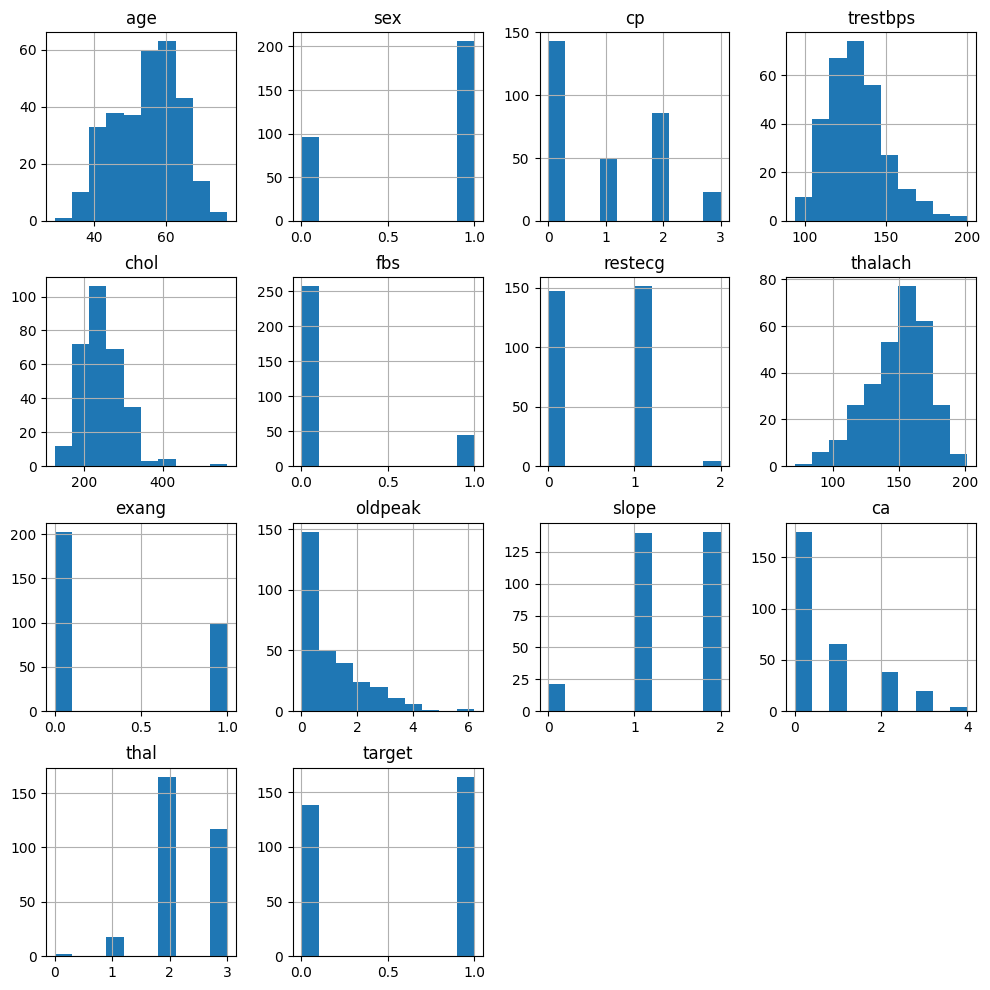

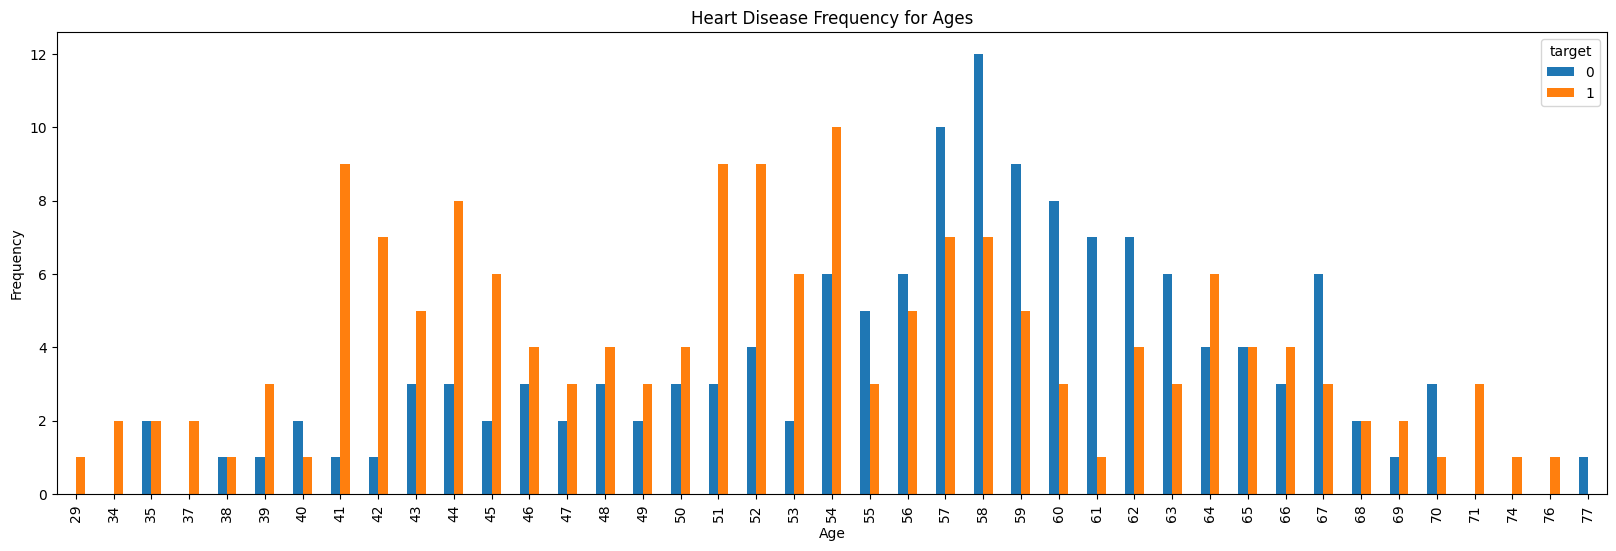

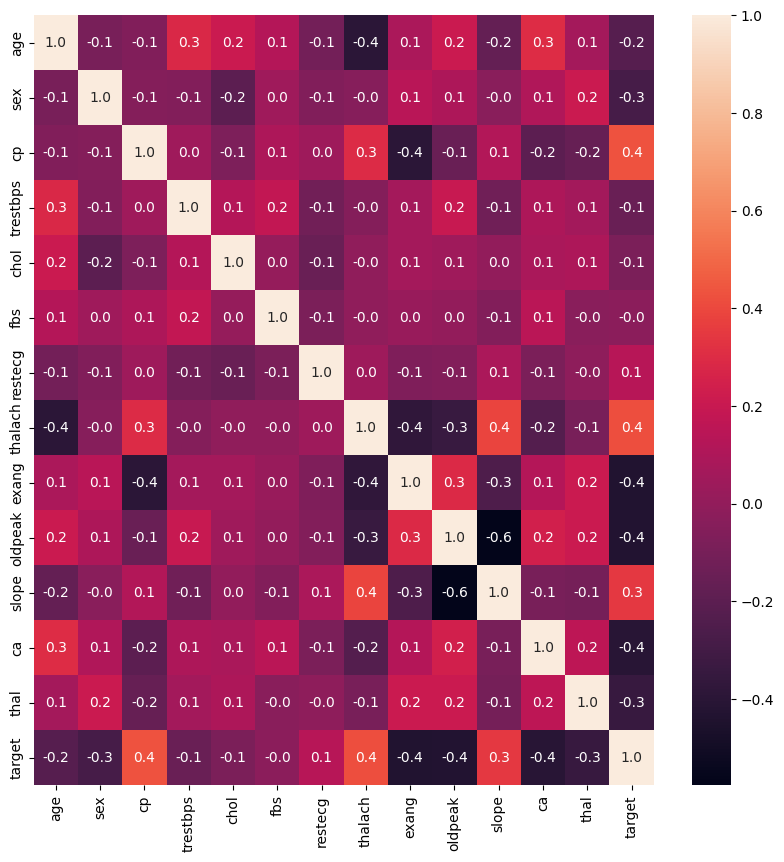

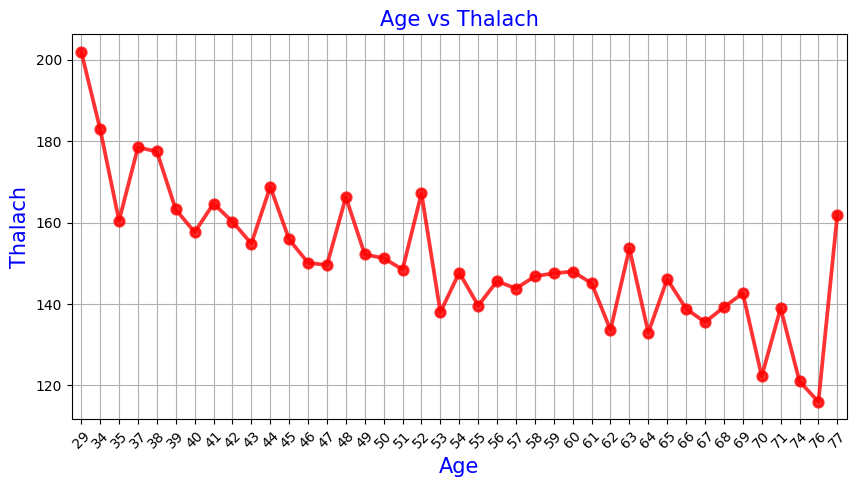

In [ ]:
# Mostrar dados estatísticos de forma visual

# Mostrar histogramas para cada coluna
dataHeart.hist(figsize = (12, 12))
plt.show()
print()

# Mostrar de forma visual, a relação idade - frequência de doenças, com um gráfico de barras
pd.crosstab(dataHeart.age,dataHeart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
print()

# Mostrar um mapa de calor para verificar a concentração de cada variável
plt.figure(figsize=(10,10))
sns.heatmap(dataHeart.corr(),annot=True,fmt='.1f')
plt.show()
print()

# Mostrar de forma visual a relação frequência cardiaca máxima e idade
# thalach = target heart rate (frequência cardíaca alvo ou máxima)
age_unique=sorted(dataHeart.age.unique())
age_thalach_values=dataHeart.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(dataHeart[dataHeart['age']==age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()


## Separação e Normalização de Dados

Esta célula executa etapas cruciais de pré-processamento de dados para preparar o conjunto de dados para o treinamento do modelo de Machine Learning:

1.  **Definição de Variáveis Independentes (X) e Dependente (y)**:
    *   `X = np.array(dataHeart.drop(['target'], axis=1))`: A matriz `X` é criada contendo todas as colunas do DataFrame `dataHeart`, exceto a coluna `'target'`. Estas são as *variáveis independentes* (ou características/features), que serão usadas como entrada para o modelo prever o resultado.
    *   `y = np.array(dataHeart['target'])`: O vetor `y` é criado contendo apenas os valores da coluna `'target'`. Esta é a *variável dependente* (ou variável alvo), que o modelo tentará prever (neste caso, a presença ou ausência de doença cardíaca).

2.  **Normalização/Padronização dos Dados de `X`**:
    *   `mean = X.mean(axis=0)`: Calcula a média de cada coluna na matriz `X`.
    *   `X -= mean`: Subtrai a média de cada coluna de seus respectivos valores. Isso centraliza os dados em torno de zero.
    *   `std = X.std(axis=0)`: Calcula o desvio padrão de cada coluna na matriz `X`.
    *   `X /= std`: Divide os valores de cada coluna pelo seu desvio padrão. Isso escala os dados para que tenham um desvio padrão de um.
    *   **Importância**: A normalização (especificamente a padronização, que transforma os dados para ter média zero e desvio padrão um) é uma etapa fundamental para algoritmos de Machine Learning, especialmente redes neurais. Ela garante que todas as características tenham a mesma escala, evitando que características com grandes valores numéricos dominem o processo de aprendizado. Isso ajuda o modelo a convergir mais rapidamente e a ter um desempenho melhor e mais estável.

In [ ]:
# X é uma matriz de vetores contém as variáveis independentes de cada linha
X = np.array(dataHeart.drop(['target'], axis=1))
# y contém a variável alvo, que é a predição, a variável dependente, a saída de cada linha
y = np.array(dataHeart['target'])

# antes da normalização
print("Antes da normalização:")
print(X[0])
print( y[0] )

# execução da normalização
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

# depois da normalização
print("Após a normalização")
print(X[0])
print(y[0])

Antes da normalização:
[ 52.   1.   0. 125. 212.   0.   1. 168.   0.   1.   2.   2.   3.]
0
Após a normalização
[-0.26796589  0.68265615 -0.93520799 -0.37655636 -0.66772815 -0.41844626
  0.90165655  0.80603539 -0.69834428 -0.03712404  0.97951442  1.27497996
  1.11996657]
0


## Separação dos Dados em Treino e Teste

Esta célula é fundamental para a preparação dos dados no processo de Machine Learning, pois divide o conjunto de dados em subconjuntos de treinamento e teste. Isso é crucial para:

1.  **Treinamento do Modelo**: O modelo aprende a partir dos padrões presentes no conjunto de treinamento.
2.  **Avaliação do Modelo**: O desempenho do modelo é avaliado usando o conjunto de teste, que contém dados que o modelo nunca viu antes. Isso fornece uma estimativa imparcial de quão bem o modelo generaliza para novos dados.

### Operação Realizada:

*   **`from sklearn import model_selection`**: Importa o módulo `model_selection` da biblioteca `scikit-learn`, que oferece utilitários para dividir dados, selecionar modelos e realizar validação cruzada.
*   **`X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)`**:
    *   `X` e `y` são as variáveis independentes (características) e dependente (alvo) do nosso dataset, respectivamente, após a normalização.
    *   `test_size = 0.2`: Define que 20% dos dados serão usados para o conjunto de teste, enquanto os 80% restantes serão para o treinamento.
    *   `random_state = 42`: Garante que a divisão dos dados seja reproduzível. Se você executar o código várias vezes com o mesmo `random_state`, obterá sempre a mesma divisão.
    *   `stratify = y`: Este é um parâmetro importante, especialmente para datasets com classes desbalanceadas. Ele garante que a proporção de cada classe da variável alvo (`y`) seja mantida tanto no conjunto de treinamento (`y_train`) quanto no conjunto de teste (`y_test`). Por exemplo, se 60% dos pacientes no dataset original têm doença cardíaca, `stratify=y` assegurará que aproximadamente 60% dos pacientes em `y_train` e `y_test` também terão doença cardíaca. Isso evita que um dos conjuntos fique com uma representação desproporcional de uma classe, o que poderia enviesar o treinamento ou a avaliação do modelo.

In [ ]:
# criar datasets X e Y de treino e teste
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)



# Construção e Compilação do Modelo de Rede Neural Keras

Esta célula é responsável por construir e compilar o modelo de rede neural que será utilizado para a predição de doenças cardíacas. Ela importa as bibliotecas necessárias, define a arquitetura da rede e, em seguida, compila o modelo para o treinamento.

### 1. Importação de Bibliotecas Essenciais:
*   **`keras.models.Sequential`**: Utilizado para criar um modelo de rede neural em que as camadas são empilhadas sequencialmente.
*   **`keras.layers.Dense`**: Representa uma camada densamente conectada (fully connected layer), onde cada neurônio da camada atual se conecta a todos os neurônios da camada anterior.
*   **`keras.optimizers.Adam`**: Um algoritmo de otimização (Adam optimizer) usado para ajustar os pesos da rede neural durante o treinamento.
*   **`keras.layers.Dropout`**: Implementa a técnica de regularização Dropout, que desativa aleatoriamente um percentual de neurônios durante o treinamento para evitar overfitting.
*   **`keras.regularizers`**: Módulo que oferece funções para aplicar regularização nos pesos das camadas, como a regularização L2.
*   **`tensorflow as tf`**: Importa a biblioteca TensorFlow, que é o backend principal do Keras.

### 2. Definição da Função `create_model()`:
Esta função constrói o modelo da rede neural:
*   **`model = Sequential()`**: Inicia um modelo sequencial.
*   **Camadas Ocultas**: A rede possui três camadas ocultas (`Dense`), cada uma com:
    *   **Número de Neurônios**: 16, 8 e 4, respectivamente. A primeira camada (`Dense(16, input_dim=13, ...)`) especifica `input_dim=13`, indicando que a entrada terá 13 características.
    *   **Inicialização dos Pesos (`kernel_initializer='normal'`)**: Os pesos são inicializados a partir de uma distribuição normal.
    *   **Regularização L2 (`kernel_regularizer=regularizers.l2(0.001)`)**: Aplica uma penalidade L2 aos pesos da camada, ajudando a prevenir o overfitting.
    *   **Função de Ativação (`activation='relu'`)**: Utiliza a função de ativação ReLU (Rectified Linear Unit), que introduz não-linearidade na rede.
    *   **Dropout (`Dropout(0.25)`)**: Após cada camada oculta, uma camada de Dropout é aplicada, desativando 25% dos neurônios aleatoriamente. Isso aumenta a robustez do modelo e reduz a dependência de neurônios específicos.
*   **Camada de Saída**: Uma camada final `Dense(1, activation='sigmoid')` é adicionada.
    *   **Um Neurônio**: Um único neurônio, adequado para problemas de classificação binária (doença cardíaca presente ou ausente).
    *   **Função de Ativação Sigmoide (`activation='sigmoid'`)**: Produz uma saída entre 0 e 1, que pode ser interpretada como a probabilidade da classe positiva.
*   **Compilação do Modelo (`model.compile(...)`)**:
    *   **Função de Perda (`loss='binary_crossentropy'`)**: Escolhida para problemas de classificação binária, mede a diferença entre as probabilidades previstas e os rótulos verdadeiros.
    *   **Otimizador (`optimizer='adam'`)**: O otimizador Adam é usado para ajustar os pesos da rede de forma eficiente durante o treinamento.
    *   **Métricas (`metrics=['accuracy']`)**: A acurácia será monitorada durante o treinamento e avaliação para medir o desempenho do modelo.

### 3. Instanciação e Sumário do Modelo:
*   `model = create_model()`: Cria uma instância do modelo de rede neural.
*   `print(model.summary())`: Exibe um resumo detalhado da arquitetura do modelo, incluindo o número de camadas, o formato da saída de cada camada e o número total de parâmetros (treináveis e não treináveis).

In [ ]:
# Importando as bibliotecas
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf # Importar tensorflow

# Definindo uma função para construir o modelo keras
# a rede neural possuira 3 camadas ocultas com função de ativação ReLu
# a camada de saida usara a função de ativação sigmoide
def create_model():


    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(4, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))

    # camada de saida
    model.add(Dense(1, activation='sigmoid'))

    # compilar o modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

model = create_model()

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

None


# Definição da *Early Stopping*

Esta célula define um callback de Early Stopping para o treinamento do modelo de rede neural, uma técnica crucial para prevenir o overfitting e otimizar o tempo de treinamento.

### 1. Importação da Biblioteca:
*   **`from keras.callbacks import EarlyStopping`**: Importa a classe `EarlyStopping` do módulo de `callbacks` do Keras, que permite parar o treinamento quando uma métrica monitorada para de melhorar.

### 2. Definição do Callback `EarlyStopping`:
*   **`early_stopping = EarlyStopping(...)`**: Cria uma instância do objeto `EarlyStopping` com os seguintes parâmetros:
    *   **`monitor='val_loss'`**: Define que a métrica a ser monitorada para decidir a parada é a `val_loss` (perda no conjunto de validação). O objetivo é que essa perda diminua.
    *   **`patience=15`**: Se a `val_loss` não melhorar por 15 épocas consecutivas, o treinamento será interrompido. Isso dá ao modelo uma chance de se recuperar de flutuações temporárias.
    *   **`restore_best_weights=True`**: Após a interrupção, os pesos do modelo serão restaurados para o estado da época em que a `val_loss` foi a menor. Isso garante que o modelo final seja aquele com o melhor desempenho de validação.
    *   **`mode='min'`**: Especifica que a métrica monitorada (`val_loss`) deve ser minimizada. Para métricas como acurácia, o `mode` seria `'max'`.

**Propósito**: O Early Stopping é uma forma eficaz de regularização. Ele impede que o modelo continue treinando excessivamente nos dados de treinamento (overfitting), o que poderia levar a uma perda de generalização para novos dados. Ao parar o treinamento no momento certo, ele garante um modelo mais robusto e com melhor capacidade de previsão.

In [ ]:
from keras.callbacks import EarlyStopping

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor the validation loss
    patience=15,        # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True, # Restore model weights from the epoch with the best value of the monitored quantity
    mode='min'          # The monitored quantity should be minimized
)

print("Early Stopping callback defined.")

Early Stopping callback defined.


## Treinamento do Modelo de Rede Neural

Esta célula executa o treinamento do modelo de rede neural, utilizando os dados de treinamento (`X_train`, `y_train`) e monitorando o desempenho com os dados de validação (`X_test`, `y_test`).

### Detalhes da Operação:

*   **`history = model.fit(X_train, y_train, ...)`**: Esta linha inicia o processo de treinamento. O método `fit()` da Keras é responsável por ajustar os pesos do modelo iterativamente com base nos dados de entrada. O objeto `history` armazena o progresso do treinamento, incluindo a perda e a acurácia para os conjuntos de treino e validação em cada época.

*   **`validation_data=(X_test, y_test)`**: Durante o treinamento, o modelo avalia seu desempenho nos dados de teste (`X_test`, `y_test`) após cada época. Esta avaliação é crucial para detectar *overfitting* (quando o modelo aprende muito bem os dados de treinamento, mas não generaliza para novos dados).

*   **`epochs=100`**: Define o número máximo de vezes que o modelo irá percorrer todo o conjunto de dados de treinamento. No entanto, o treinamento pode ser interrompido antes deste limite devido ao uso de *callbacks*.

*   **`batch_size=10`**: O treinamento é realizado em *batches* (lotes) de 10 amostras. Isso significa que o modelo processa 10 exemplos de treinamento por vez e atualiza seus pesos com base no erro calculado para esse lote, em vez de esperar por todo o conjunto de dados.

*   **`callbacks=[early_stopping]`**: Este parâmetro é fundamental, pois ativa o *callback* de `EarlyStopping` (definido em uma célula anterior). O `EarlyStopping` monitora a métrica `val_loss` (perda no conjunto de validação) e interrompe o treinamento se ela não melhorar por um determinado número de épocas (`patience`). Além disso, ele restaura os pesos do modelo para a melhor época, evitando o overfitting e garantindo que o modelo final seja o que teve o melhor desempenho de validação.

In [ ]:
# Treinar o modelo com os dados de treino
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, callbacks=[early_stopping])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.4935 - loss: 0.6941 - val_accuracy: 0.5410 - val_loss: 0.6930
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5176 - loss: 0.6929 - val_accuracy: 0.5410 - val_loss: 0.6916
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5552 - loss: 0.6913 - val_accuracy: 0.7213 - val_loss: 0.6876
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6922 - loss: 0.6871 - val_accuracy: 0.7869 - val_loss: 0.6779
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7481 - loss: 0.6733 - val_accuracy: 0.7705 - val_loss: 0.6544
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8106 - loss: 0.6371 - val_accuracy: 0.7705 - val_loss: 0.6045
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7836 - loss: 0.5823 - val_accuracy: 0.7705 - val_loss: 0.5463
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8219 - loss: 0.5399 - val_accuracy: 0.

## Visualização do Histórico de Treinamento do Modelo

Esta célula é responsável por gerar e exibir gráficos que visualizam o histórico de treinamento do modelo de rede neural, especificamente a evolução da acurácia e da perda ao longo das épocas. Essas visualizações são cruciais para entender o desempenho do modelo e diagnosticar problemas como *overfitting* ou *underfitting*.

### 1. Gráfico da Acurácia do Modelo (`Model Accuracy`):
*   **`plt.plot(history.history['accuracy'])`**: Plota a acurácia do modelo no conjunto de *treinamento* para cada época.
*   **`plt.plot(history.history['val_accuracy'])`**: Plota a acurácia do modelo no conjunto de *validação* (ou teste) para cada época. A comparação entre a acurácia de treinamento e validação é fundamental. Se a acurácia de treinamento continua a subir enquanto a de validação estagna ou cai, é um forte indicativo de *overfitting*.
*   Os comandos `plt.title`, `plt.ylabel`, `plt.xlabel` e `plt.legend` são utilizados para adicionar título, rótulos aos eixos e uma legenda, respectivamente, tornando o gráfico claro e informativo.
*   `plt.show()`: Exibe o gráfico de acurácia.

### 2. Gráfico da Perda do Modelo (`Model Loss`):
*   **`plt.plot(history.history['loss'])`**: Plota o valor da função de perda do modelo no conjunto de *treinamento* para cada época.
*   **`plt.plot(history.history['val_loss'])`**: Plota o valor da função de perda do modelo no conjunto de *validação* (ou teste) para cada época. Similar à acurácia, a análise comparativa das perdas de treinamento e validação é vital. Se a perda de treinamento continua a diminuir, mas a perda de validação começa a aumentar, isso também aponta para *overfitting*, onde o modelo está se ajustando demais aos dados de treinamento e perdendo sua capacidade de generalização.
*   Da mesma forma, `plt.title`, `plt.ylabel`, `plt.xlabel` e `plt.legend` são usados para adicionar os metadados do gráfico.
*   `plt.show()`: Exibe o gráfico de perda.

Esses gráficos oferecem uma representação visual imediata e poderosa da dinâmica de aprendizado do modelo, auxiliando na tomada de decisões para otimizar o treinamento.

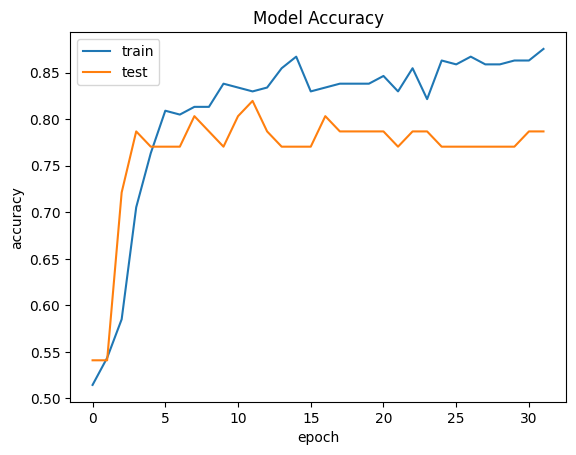

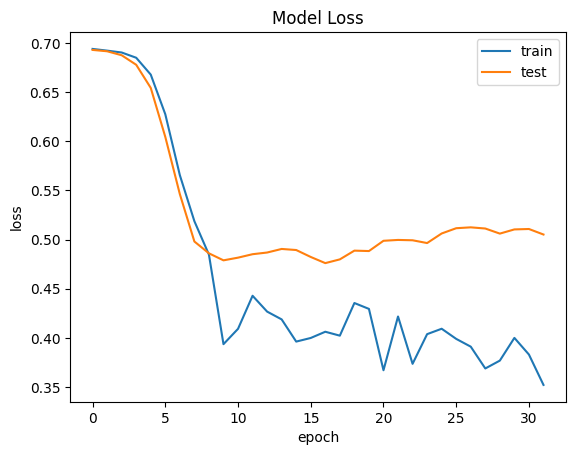

In [ ]:
# Mostrar visualmente a acurácia do modelo
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

print()

# Mostrar visualmente a perda do modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Resultados e métricas




As células de código abaixo apresenta uma tabela de métricas do modelo de rede neural implementado. Seguem dados acerca da acurácia, recall, f1-score e quantidade de dados de suporte tanto para casos em que o modelo fornece um feedback negativo (0) quanto para casos em que o modelo fornece um feedback positivo (1). Ademais, é apresentada a matriz de confusão referente ao modelo.

In [ ]:
# Gerando um relatório de classificação do modelo binário

from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model
binary_pred = np.round(model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Results for Binary Model
0.8032786885245902
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## Visualização da Matriz de Confusão


### O que o código faz:

1.  **Importação de Bibliotecas**: Importa `matplotlib.pyplot` e `seaborn` para a criação e estilização de gráficos, e `confusion_matrix` da `sklearn.metrics` para o cálculo da matriz.

2.  **Cálculo da Matriz de Confusão**: A linha `cm = confusion_matrix(y_test, binary_pred)` gera a matriz de confusão. Ela compara os rótulos verdadeiros do conjunto de teste (`y_test`) com as previsões do modelo (`binary_pred`). A matriz resultante categoriza os resultados em:
    *   **Verdadeiros Positivos (TP)**: Casos da classe positiva corretamente previstos como positivos.
    *   **Verdadeiros Negativos (TN)**: Casos da classe negativa corretamente previstos como negativos.
    *   **Falsos Positivos (FP)**: Casos da classe negativa incorretamente previstos como positivos (Erro Tipo I).
    *   **Falsos Negativos (FN)**: Casos da classe positiva incorretamente previstos como negativos (Erro Tipo II).

3.  **Visualização Gráfica**: Utiliza `seaborn.heatmap()` para criar uma representação visual da matriz de confusão. Com `annot=True` e `fmt='d'`, os valores numéricos de TP, TN, FP e FN são exibidos diretamente no mapa de calor, facilitando a leitura. Os `xticklabels` e `yticklabels` são configurados para indicar claramente as classes previstas e reais, tornando o gráfico intuitivo.

### Importância da Matriz de Confusão:

A matriz de confusão é mais informativa do que uma simples métrica de acurácia, pois ela detalha *onde* o modelo está acertando e errando. Sua importância reside em:

*   **Análise Detalhada dos Erros**: Permite entender os tipos específicos de erros. Por exemplo, em um diagnóstico médico, Falsos Negativos (não identificar uma doença presente) podem ser muito mais críticos do que Falsos Positivos (identificar uma doença que não existe).

*   **Cálculo de Métricas Específicas**: A partir da matriz, podem-se calcular métricas como:
    *   **Precisão**: Proporção de previsões positivas que estavam corretas.
    *   **Recall (Sensibilidade)**: Proporção de casos positivos reais que foram corretamente identificados.
    *   **F1-Score**: Média harmônica entre precisão e recall.
    *   **Especificidade**: Proporção de casos negativos reais que foram corretamente identificados.

*   **Avaliação em Cenários Desbalanceados**: Em conjuntos de dados com classes desproporcionais, a acurácia pode ser enganosa. A matriz e as métricas dela derivadas oferecem uma visão mais realista do desempenho para cada classe, sendo essencial para uma avaliação completa do modelo.

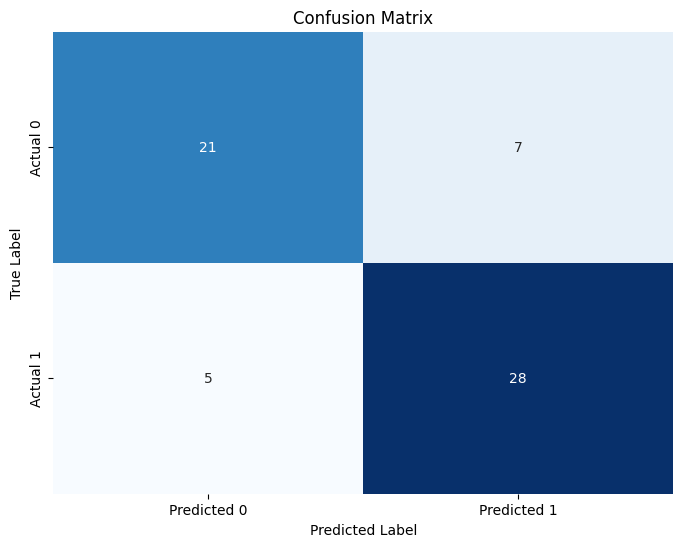

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, binary_pred)

# Create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Teste do Modelo com Casos Externos

Esta célula demonstra como o modelo treinado de rede neural pode ser utilizado para fazer previsões em um **novo conjunto de dados externos**, simulando a aplicação do modelo em situações reais com dados de pacientes que ele nunca viu. A célula realiza as seguintes etapas:

1.  **Criação de Casos de Teste (`test_cases`)**:
    *   `test_cases = pd.DataFrame(columns=dataHeart.drop('target', axis=1).columns)`: Um novo DataFrame chamado `test_cases` é criado. Ele tem as mesmas colunas (características) do conjunto de dados original (`dataHeart`), exceto a coluna `target`, que é o que queremos prever.
    *   `test_cases.loc[0] = [...]`, `test_cases.loc[1] = [...]`, etc.: Várias linhas são adicionadas a este DataFrame, cada uma representando um "paciente" com um conjunto específico de características (idade, sexo, tipo de dor no peito, etc.). Estes são os dados de entrada para os quais queremos que o modelo faça uma previsão.
    *   `display(test_cases)`: Exibe o DataFrame de casos de teste para visualização.

2.  **Normalização dos Casos de Teste**:
    *   `test_cases_array = test_cases.values`: Converte o DataFrame de casos de teste em um array NumPy.
    *   `test_cases_normalized = (test_cases_array - mean) / std`: **Crucialmente, os novos casos de teste são normalizados usando os *mesmos valores de média (`mean`) e desvio padrão (`std`)* que foram calculados e usados para normalizar os dados de treinamento (`X`)**. Isso é fundamental para garantir que os novos dados estejam na mesma escala que os dados nos quais o modelo foi treinado, permitindo que o modelo faça previsões precisas.

3.  **Função de Predição (`predict_heart_disease`)**:
    *   Uma função `predict_heart_disease` é definida para encapsular a lógica de previsão.
    *   Ela recebe os dados de teste (já normalizados), faz a previsão usando `model.predict(test_data)`, e então arredonda as probabilidades de saída para 0 ou 1 (`np.round(...)`).
    *   A função então traduz esses resultados binários em mensagens mais legíveis como "Possui doença cardíaca" ou "Não possui doença cardíaca".

4.  **Realização e Exibição das Previsões**:
    *   `predictions = predict_heart_disease(test_cases_normalized)`: A função é chamada com os casos de teste normalizados para obter as previsões.
    *   Um loop imprime o resultado da previsão para cada paciente nos casos de teste.

**Como o modelo está testando para um novo conjunto de dados externos?**

Esta célula simula o teste em um novo conjunto de dados "externo" ao:
*   **Criar artificialmente** exemplos de pacientes (linhas no `test_cases`).
*   **Pré-processar esses novos exemplos exatamente da mesma forma** que os dados de treinamento foram pré-processados (especialmente a normalização, usando os parâmetros `mean` e `std` derivados do conjunto de treinamento).
*   **Utilizar o `model.predict()`** para obter as saídas do modelo para esses novos, nunca-antes-vistos, exemplos. A capacidade do modelo de fazer previsões razoáveis nesses casos simulados indica sua habilidade de generalizar para dados reais futuros.

In [ ]:
test_cases = pd.DataFrame(columns=dataHeart.drop('target', axis=1).columns)
test_cases.loc[0] = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]
test_cases.loc[1] = [67, 1, 0, 160, 286, 0, 0, 108, 1, 1.5, 1, 3, 2]
test_cases.loc[2] = [37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2]
test_cases.loc[3] = [41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2]
test_cases.loc[4] = [56, 1, 0, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2]
test_cases.loc[5] = [60, 0, 0, 102, 318, 0, 1, 160, 0, 0.0, 2, 1, 2]
test_cases.loc[6] = [55, 1, 0, 160, 289, 0, 0, 145, 1, 0.8, 1, 1, 3]
test_cases.loc[7] = [46, 1, 2, 150, 231, 0, 1, 147, 0, 3.6, 1, 0, 2]
test_cases.loc[8] = [51, 1, 0, 140, 298, 0, 0, 122, 1, 4.2, 1, 3, 3]
test_cases.loc[9] = [40, 1, 0, 124, 199, 0, 1, 179, 1, 0.0, 2, 0, 3]
test_cases.loc[10] = [58, 0, 0, 170, 225, 1, 0, 146, 1, 2.8, 1, 2, 1]

print("Casos de teste gerados:")
display(test_cases)

# normaliza os casos de teste, mas não precisa printar
test_cases_array = test_cases.values
test_cases_normalized = (test_cases_array - mean) / std


def predict_heart_disease(test_data):
    test_data = np.array(test_data)

    if test_data.ndim == 1:
        test_data = test_data.reshape(1, -1)

    predictions = model.predict(test_data)
    rounded_predictions = np.round(predictions).astype(int)

    results = []
    if rounded_predictions.shape[0] == 1:
        if rounded_predictions[0][0] == 1:
            results.append("Possui doença cardiaca")
        else:
            results.append("Não possui doença cardiaca")
    else:
        for prediction in rounded_predictions:
            if prediction[0] == 1:
                results.append("Possui doença cardiaca")
            else:
                results.append("Não possui doença cardiaca")

    return results if len(results) > 1 else results[0]


print("\nPrevisões para os casos de teste:")
predictions = predict_heart_disease(test_cases_normalized)

cont = 0
for i in  predictions:
  print("Paciente ", cont, "Resultado: ", i)
  cont= cont + 1

Casos de teste gerados:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,2.0
2,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
3,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
4,56.0,1.0,0.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
5,60.0,0.0,0.0,102.0,318.0,0.0,1.0,160.0,0.0,0.0,2.0,1.0,2.0
6,55.0,1.0,0.0,160.0,289.0,0.0,0.0,145.0,1.0,0.8,1.0,1.0,3.0
7,46.0,1.0,2.0,150.0,231.0,0.0,1.0,147.0,0.0,3.6,1.0,0.0,2.0
8,51.0,1.0,0.0,140.0,298.0,0.0,0.0,122.0,1.0,4.2,1.0,3.0,3.0
9,40.0,1.0,0.0,124.0,199.0,0.0,1.0,179.0,1.0,0.0,2.0,0.0,3.0



Previsões para os casos de teste:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Paciente  0 Resultado:  Possui doença cardiaca
Paciente  1 Resultado:  Não possui doença cardiaca
Paciente  2 Resultado:  Possui doença cardiaca
Paciente  3 Resultado:  Possui doença cardiaca
Paciente  4 Resultado:  Possui doença cardiaca
Paciente  5 Resultado:  Possui doença cardiaca
Paciente  6 Resultado:  Não possui doença cardiaca
Paciente  7 Resultado:  Possui doença cardiaca
Paciente  8 Resultado:  Não possui doença cardiaca
Paciente  9 Resultado:  Não possui doença cardiaca
Paciente  10 Resultado:  Não possui doença cardiaca


# Uma breve conclusão sobre a eficácia do modelo e a importância da normalização dos dados
O modelo de rede neural para a predição de doenças cardíacas demonstrou uma eficácia notável, alcançando uma acurácia que se ma ~80% no conjunto de teste. Essa performance é robusta, com métricas de precisão, recall e F1-score bem balanceadas para ambas as classes (pacientes com e sem doença cardíaca), indicando uma boa capacidade de discriminar entre os dois grupos e, mais importante, de generalizar bem para novos dados não vistos durante o treinamento.

# Analisando o Relatório de Classificação:

**Classe 0 (Não possui doença cardíaca):**

**Precisão (Precision):** 0.81. Dos pacientes que o modelo previu que não tinham doença cardíaca, 81% realmente não tinham. Isso indica uma baixa taxa de falsos positivos para esta classe.

**Recall:** 0.75. Dos pacientes que realmente não tinham doença cardíaca, o modelo identificou corretamente 75%. Isso significa que 25% dos pacientes sem doença foram classificados erroneamente como tendo a doença (falsos negativos).

**F1-score:** 0.78. É a média harmônica da precisão e recall, oferecendo um bom equilíbrio entre as duas métricas para a classe 0.

**Classe 1 (Possui doença cardíaca):**

**Precisão (Precision):** 0.80. Dos pacientes que o modelo previu que tinham doença cardíaca, 80% realmente tinham. Isso indica uma taxa aceitável de falsos positivos para esta classe.

**Recall:** 0.85. Dos pacientes que realmente tinham doença cardíaca, o modelo identificou corretamente 85%. Isso é importante, pois significa que a maioria dos casos positivos foi detectada, o que é crucial para doenças como problemas cardíacos.

**F1-score:** 0.82. Reflete um bom balanço entre precisão e recall para a classe 1.

Em resumo, o modelo demonstra uma boa capacidade geral de prever a presença ou ausência de doença cardíaca, com um desempenho ligeiramente melhor na identificação de pacientes com a doença (maior recall para a classe 1), o que é desejável em um contexto médico para minimizar diagnósticos perdidos.





# Contudo, essa eficácia não seria possível sem um passo de pré-processamento fundamental: a normalização dos dados. A importância da normalização reside em vários aspectos:

# Escala Consistente:
Variáveis como “idade” (geralmente entre 29-77) e “colesterol” (colesterol, que pode variar entre 126-564) possuem escalas muito diferentes. Sem normalização, o modelo tenderia a dar um peso desproporcional a características com maiores valores numéricos, independentemente de sua real importância preditiva. A normalização garante que todas as características contribuam igualmente para o cálculo do gradiente durante o treinamento, evitando que características com grandes magnitudes dominem o processo de otimização.

# Convergência Otimizada:
Ao centralizar os dados em torno de zero e escalá-los para terem um desvio padrão de um, a paisagem da função de perda se torna mais simétrica e menos alongada. Isso permite que os algoritmos de otimização encontrem o mínimo global (ou um mínimo próximo) de forma mais rápida e eficiente. Sem a normalização, o otimizador poderia "saltar" excessivamente ou ficar preso em mínimos locais.



#  Regularização Aprimorada:
A normalização trabalha em sinergia com técnicas de regularização, como a regularização L2 (kernel_regularizer=regularizers.l2(0.001)) e o Dropout (Dropout(0.25)) aplicados em nosso modelo. Modelos com características normalizadas tendem a ser menos sensíveis a pequenas variações nos dados de entrada, o que contribui para uma melhor generalização e menor overfitting.


# Melhor Interpretabilidade (durante o treinamento):
 Embora as características transformadas não sejam diretamente interpretáveis para um ser humano, internamente o modelo pode aprender relações mais significativas e estáveis entre as características, uma vez que elas estão em uma escala comparável.
Em resumo, a normalização dos dados não é apenas uma boa prática, mas uma condição essencial para que as redes neurais e muitos outros algoritmos de Machine Learning operem de forma eficaz e atinjam seu potencial máximo. Ela permite que o modelo aprenda padrões verdadeiros nos dados, em vez de ser influenciado por diferenças arbitrárias de escala, resultando na capacidade de generalização e eficácia observadas neste modelo de previsão de doenças cardíacas.
